# Question 4 (30%)

As a manager considers to 5 potential warehouses to store medical supply materials in order to cover the demand of the 10 hospitals in the area. The geographical information is provided in the attached Excel file. The demand of hospitals and the capacity and setup cost of warehouses are also provided. If you were the manager, how will you make decisions for the following plans? Develop and solve mathematical optimization models accordingly to provide resulting information to support your decisions.

In [2]:
import pandas as pd
hospital = pd.read_excel('IE5400_HW03-location selection.xlsx', sheet_name = 1)
warehouse = pd.read_excel('IE5400_HW03-location selection.xlsx', sheet_name = 2)

In [3]:
hospital

,Hospital,x,y,# Cases
0,H1,12,12,230
1,H2,9,4,280
2,H3,6,9,145
3,H4,3,9,112
4,H5,8,2,235
5,H6,4,1,405
6,H7,6,4,290
7,H8,5,7,370
8,H9,1,8,189
9,H10,4,6,405


In [4]:
warehouse

,Warehouse,x,y,Capacity,Setup Cost
0,w1,4,5,1300,8000
1,w2,8,3,1000,6000
2,w3,7,7,1500,9000
3,w4,6,6,1600,9000
4,w5,10,8,2000,12000


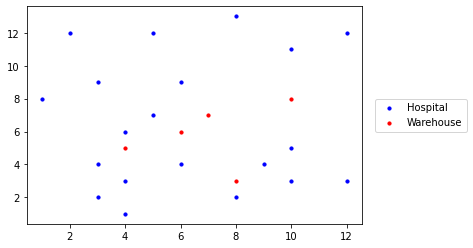

In [5]:
import matplotlib.pyplot as plt 

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(hospital['x'], hospital['y'], s=10, c='b', marker="o", label='Hospital')
ax1.scatter(warehouse['x'], warehouse['y'], s=10, c='r', marker="o", label='Warehouse')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0);
plt.show()

1. How to determine the assignment of hospitals to warehouses by only considering minimum travel distance regardless of demand. A warehouse could cover more than one hospital. 

In [6]:
# Import math package
import math

# Create Lists for dictionary
w1 = []
w2 = []
w3 = []
w4 = []
w5 = []

# Initialize distances list
distances = []

# Clear the original lists to enable multiple code runs
w1.clear()
w2.clear()
w3.clear()
w4.clear()
w5.clear()

In [7]:
# Iterate through each hospital
for i in range(0, len(hospital)):
    
    # Clear the distance list
    distances.clear()
    
    # Iterate through each warehouse for every hospital
    for j in range(0, len(warehouse)):
        # x2 - x1
        x2 = hospital['x'][i]
        x1 = warehouse['x'][j]
        
        # y2 - y1
        y2 = hospital['y'][i]
        y1 = warehouse['y'][j]
        
        # Get distances, and add them to the list
        dist = math.hypot(x2 - x1, y2 - y1)
        distances.append(dist)
    
    # Get the minimum distance, and the matching index
    minimum = min(distances)
    index = distances.index(minimum)
    
    # Use the index to match the hospital with the closest warehouse
    if index == 0:
        w1.append(hospital['Hospital'][i])
    elif index == 1:
        w2.append(hospital['Hospital'][i])
    elif index == 2:
        w3.append(hospital['Hospital'][i])
    elif index == 3:
        w4.append(hospital['Hospital'][i])
    elif index == 4:
        w5.append(hospital['Hospital'][i])

In [8]:
# Combine the warehouse lists together
comb_list = []
comb_list.extend([w1, w2, w3, w4, w5])

# Create  dictionary 
dictionary = {} 

# Use warehouses as the dicitonary keys 
keys = warehouse['Warehouse']

# Match the warehouses with the hospitals using the combined list
for i in range(0, len(keys)): 
    dictionary[keys[i]] = comb_list[i]
    
dictionary

{'w1': ['H4', 'H6', 'H9', 'H10', 'H13', 'H16', 'H20'],
 'w2': ['H2', 'H5', 'H11', 'H12', 'H18'],
 'w3': ['H3', 'H15', 'H19'],
 'w4': ['H7', 'H8'],
 'w5': ['H1', 'H14', 'H17']}

2. Now only two warehouses can be installed among 5 potential locations to cover the demand of 10 hospitals maximally within a minimum distance. Which two locations will be the best choice regardless of setup cost? And what is the assignment plan?

In [9]:
dist_df = pd.DataFrame(columns = list(warehouse['Warehouse']))
# Iterate through each hospital
for i in range(0, len(hospital)):
    
    # Clear the distance list
    distances.clear()
    
    # Iterate through each warehouse for every hospital
    for j in range(0, len(warehouse)):
        # x2 - x1
        x2 = hospital['x'][i]
        x1 = warehouse['x'][j]
        
        # y2 - y1
        y2 = hospital['y'][i]
        y1 = warehouse['y'][j]
        
        # Get distances, and add them to the list
        dist = math.hypot(x2 - x1, y2 - y1)
        distances.append(dist)
    dist_df.loc[i] = distances
dist_df.insert(0, 'Hospital', list(hospital['Hospital']))
dist_df.insert(6, 'Cases', list(hospital['# Cases']))
dist_df

,Hospital,w1,w2,w3,w4,w5,Cases
0,H1,10.630146,9.848858,7.071068,8.485281,4.472136,230
1,H2,5.099020,1.414214,3.605551,3.605551,4.123106,280
2,H3,4.472136,6.324555,2.236068,3.000000,4.123106,145
3,H4,4.123106,7.810250,4.472136,4.242641,7.071068,112
4,H5,5.000000,1.000000,5.099020,4.472136,6.324555,235
5,H6,4.000000,4.472136,6.708204,5.385165,9.219544,405
6,H7,2.236068,2.236068,3.162278,2.000000,5.656854,290
7,H8,2.236068,5.000000,2.000000,1.414214,5.099020,370
8,H9,4.242641,8.602325,6.082763,5.385165,9.000000,189
9,H10,1.000000,5.000000,3.162278,2.000000,6.324555,405


In [39]:
pt1 = [1] * 10
pt2 = [0] * 10

a = pt1 + pt2
b = pt2 + pt1

ls_a = list(dist_df['w3'])
ls_b = list(dist_df['w4'])
cases = list(hospital['# Cases'])
new_cases = []

for ele in cases:
    if type(ele) == str:
        ele = int(ele[-3:])
        new_cases.append(ele)
        continue
    new_cases.append(ele)

total_cases_1 = []
total_cases_2 = []

In [40]:
import gurobipy as gp
from gurobipy import GRB

try:

    # Create a new model
    m = gp.Model()

    # Create variables
    a1 = m.addVar(name="a1")
    a2 = m.addVar(name="a2")
    a3 = m.addVar(name="a3")
    a4 = m.addVar(name="a4")
    a5 = m.addVar(name="a5")
    a6 = m.addVar(name="a6")
    a7 = m.addVar(name="a7")
    a8 = m.addVar(name="a8")
    a9 = m.addVar(name="a9")
    a10 = m.addVar(name="a10")
    a11 = m.addVar(name="a11")
    a12 = m.addVar(name="a12")
    a13 = m.addVar(name="a13")
    a14 = m.addVar(name="a14")
    a15 = m.addVar(name="a15")
    a16 = m.addVar(name="a16")
    a17 = m.addVar(name="a17")
    a18 = m.addVar(name="a18")
    a19 = m.addVar(name="a19")
    a20 = m.addVar(name="a20")
    
    b1 = m.addVar(name="b1")
    b2 = m.addVar(name="b2")
    b3 = m.addVar(name="b3")
    b4 = m.addVar(name="b4")
    b5 = m.addVar(name="b5")
    b6 = m.addVar(name="b6")
    b7 = m.addVar(name="b7")
    b8 = m.addVar(name="b8")
    b9 = m.addVar(name="b9")
    b10 = m.addVar(name="b10")
    b11 = m.addVar(name="b11")
    b12 = m.addVar(name="b12")
    b13 = m.addVar(name="b13")
    b14 = m.addVar(name="b14")
    b15 = m.addVar(name="b15")
    b16 = m.addVar(name="b16")
    b17 = m.addVar(name="b17")
    b18 = m.addVar(name="b18")
    b19 = m.addVar(name="b19")
    b20 = m.addVar(name="b20")
    
    a = [a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16, a17, a18, a19, a20]
    b = [b1, b2, b3, b4, b5, b6, b7, b8, b9, b10, b11, b12, b13, b14, b15, b16, b17, b18, b19, b20]

    sum1 = sum(x * y for x, y in zip(a, ls_a))
    sum2 = sum(i * j for i, j in zip(b, ls_b))
    
    sum3 = sum(e * f for e, f in zip(a, new_cases))
    sum4 = sum(g * h for g, h in zip(b, new_cases))
    
    # Set objective
    m.setObjective(sum1 + sum2, GRB.MAXIMIZE)
    
    # Constraints
    m.addConstr(sum(a) == 10)
    m.addConstr(sum(b) == 10)
    
    for elements in range(0, 20):
        m.addConstr(a[elements] + b[elements] == 1)

    # Capacity constraints, I couldn't get this to work
    # m.addConstr(sum3 <= 1300)
    # m.addConstr(sum4 <= 2000)
    
    # Optimize model
    m.optimize()
    
    for v in m.getVars():
        print('%s = %g' % (v.varName, v.x)) 
    print('Obj: %g' % m.objVal)

except gp.GurobiError as e:
    print('Error code ' + str(e.errno) + ': ' + str(e))

except AttributeError:
    print('Encountered an attribute error')

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 22 rows, 40 columns and 80 nonzeros
Model fingerprint: 0xc5d76c13
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 8e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+01]
Presolve removed 21 rows and 23 columns
Presolve time: 0.01s
Presolved: 1 rows, 17 columns, 17 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0498904e+02   0.000000e+00   0.000000e+00      0s
       0    1.0498904e+02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.02 seconds
Optimal objective  1.049890429e+02
a1 = 0
a2 = 0
a3 = 0
a4 = 1
a5 = 1
a6 = 1
a7 = 1
a8 = 1
a9 = 1
a10 = 1
a11 = 0
a12 = 0
a13 = 1
a14 = 0
a15 = 0
a16 = 1
a17 = 0
a18 = 0
a19 = 0
a20 = 1
b1 = 1
b2 = 1
b3 = 1
b4 = 0
b5 = 0
b6 = 0
b7 = 0
b8 = 0
b9 = 0
b10 = 0
b11 = 1
b12 = 1
b13 = 0
b1

3. Regardless of warehouse capacity, what is the development plan including how many warehouses to install and hospital assignment?

In [41]:
pt1 = [1] * 10
pt2 = [0] * 10

a = pt1 + pt2
b = pt2 + pt1

ls_a = list(dist_df['w3'])
ls_b = list(dist_df['w4'])
cases = list(hospital['# Cases'])
new_cases = []

for ele in cases:
    if type(ele) == str:
        ele = int(ele[-3:])
        new_cases.append(ele)
        continue
    new_cases.append(ele)

total_cases_1 = []
total_cases_2 = []

In [42]:
try:

    # Create a new model
    m = gp.Model()

    # Create variables
    a1 = m.addVar(name="a1")
    a2 = m.addVar(name="a2")
    a3 = m.addVar(name="a3")
    a4 = m.addVar(name="a4")
    a5 = m.addVar(name="a5")
    a6 = m.addVar(name="a6")
    a7 = m.addVar(name="a7")
    a8 = m.addVar(name="a8")
    a9 = m.addVar(name="a9")
    a10 = m.addVar(name="a10")
    a11 = m.addVar(name="a11")
    a12 = m.addVar(name="a12")
    a13 = m.addVar(name="a13")
    a14 = m.addVar(name="a14")
    a15 = m.addVar(name="a15")
    a16 = m.addVar(name="a16")
    a17 = m.addVar(name="a17")
    a18 = m.addVar(name="a18")
    a19 = m.addVar(name="a19")
    a20 = m.addVar(name="a20")
    
    b1 = m.addVar(name="b1")
    b2 = m.addVar(name="b2")
    b3 = m.addVar(name="b3")
    b4 = m.addVar(name="b4")
    b5 = m.addVar(name="b5")
    b6 = m.addVar(name="b6")
    b7 = m.addVar(name="b7")
    b8 = m.addVar(name="b8")
    b9 = m.addVar(name="b9")
    b10 = m.addVar(name="b10")
    b11 = m.addVar(name="b11")
    b12 = m.addVar(name="b12")
    b13 = m.addVar(name="b13")
    b14 = m.addVar(name="b14")
    b15 = m.addVar(name="b15")
    b16 = m.addVar(name="b16")
    b17 = m.addVar(name="b17")
    b18 = m.addVar(name="b18")
    b19 = m.addVar(name="b19")
    b20 = m.addVar(name="b20")
    
    a = [a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16, a17, a18, a19, a20]
    b = [b1, b2, b3, b4, b5, b6, b7, b8, b9, b10, b11, b12, b13, b14, b15, b16, b17, b18, b19, b20]

    sum1 = sum(x * y for x, y in zip(a, ls_a))
    sum2 = sum(i * j for i, j in zip(b, ls_b))
    
    # Set objective
    m.setObjective(sum1 + sum2, GRB.MINIMIZE)
    
    # Constraints
    m.addConstr(sum(a) == 10)
    m.addConstr(sum(b) == 10)
    
    for elements in range(0, 20):
        m.addConstr(a[elements] + b[elements] == 1)

    
    # Optimize model
    m.optimize()
    
    for v in m.getVars():
        print('%s = %g' % (v.varName, v.x)) 
    print('Obj: %g' % m.objVal)

except gp.GurobiError as e:
    print('Error code ' + str(e.errno) + ': ' + str(e))

except AttributeError:
    print('Encountered an attribute error')

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 22 rows, 40 columns and 80 nonzeros
Model fingerprint: 0x68de31d2
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 8e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+01]
Presolve removed 22 rows and 40 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    8.8570780e+01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.02 seconds
Optimal objective  8.857078010e+01
a1 = 1
a2 = 1
a3 = 1
a4 = 0
a5 = 0
a6 = 0
a7 = 0
a8 = 0
a9 = 0
a10 = 0
a11 = 1
a12 = 1
a13 = 0
a14 = 1
a15 = 1
a16 = 0
a17 = 1
a18 = 1
a19 = 1
a20 = 0
b1 = 0
b2 = 0
b3 = 0
b4 = 1
b5 = 1
b6 = 1
b7 = 1
b8 = 1
b9 = 1
b10 = 1
b11 = 0
b12 = 0
b13 = 1
b14 = 0
b15 = 0
b16 = 1
b17 = 0
b18 = 0
b19 = 0
b20 = 1
Obj: 88.5708
